Haaris Bin Sulaiman
P2112815
CA1 Part B


# CIFAR FINE MODE

## DATA PREPARATION

In [ ]:
import tensorflow as tf
import sys
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode = 'fine')
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

169001437/169001437 [==============================] - 2s 0us/step


## DATA VISUALIZATION

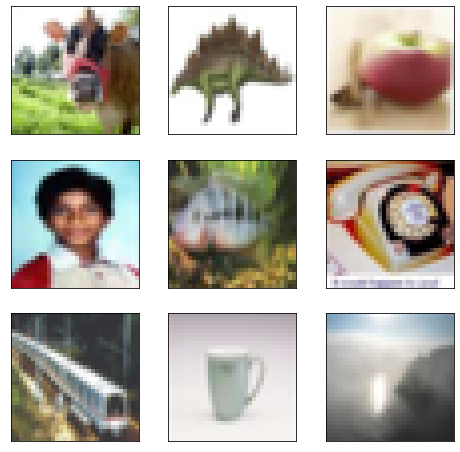

In [ ]:
def visualize_random_images(images):
    plt.figure(figsize=(8,8))
    for ind, img in enumerate(images[:9, :]):
        plt.subplot(int("33%d" % (ind + 1)))
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
visualize_random_images(X_train)

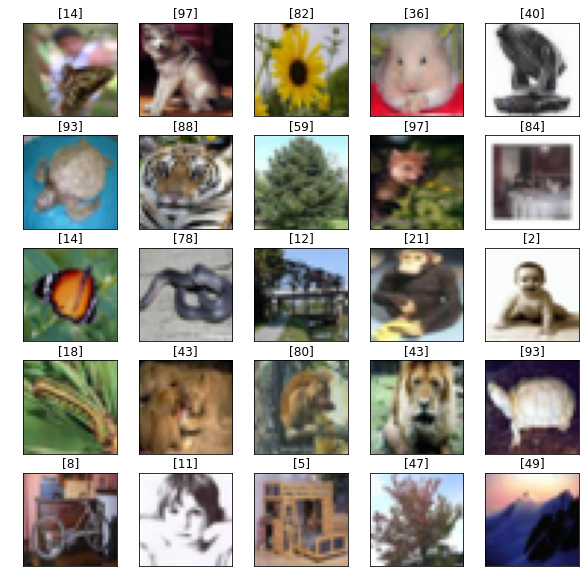

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num=np.random.randint(0,50000)
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(X_train[rand_num])
    # Erase the value of a tick
    plt.xticks(color="None")
    plt.yticks(color="None")
    # Erase the tick x-axis and y-axis
    plt.tick_params(length=0)
    # Show correct label
    plt.title(y_train[rand_num])
 
plt.show()

## DATA PREPROCESSING

In [ ]:
# one hot encode target values
# one hot encode target values
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)


In [ ]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [ ]:
X_train, X_test = prep_pixels(X_train, X_test)

## TRAINING AND EVALUATON

I will be making 3 baseline models, each getting more and more complexed. I will then be comaparing the training and test scores

### baseline model 1

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                        

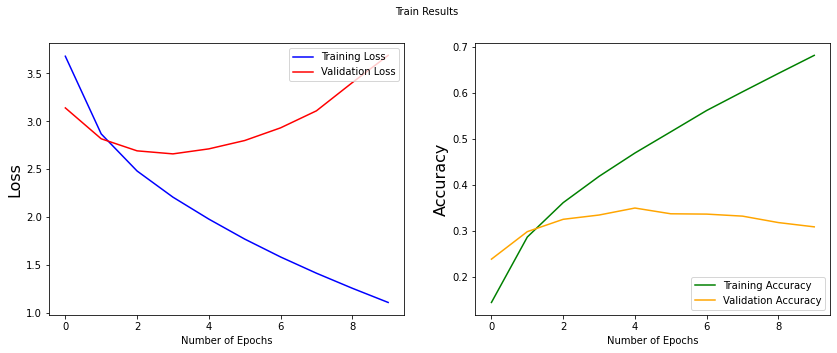


Train accuracy of the model: 68.18000078201294
Train loss of the model:  1.112114667892456
Validation accuracy of the model:  0.3089999854564667
Validation loss of the model:  3.687716007232666
Test Loss: 3.687716007232666
Test Accuracy: 0.3089999854564667


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

### baseline model 2

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))
# compile model
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

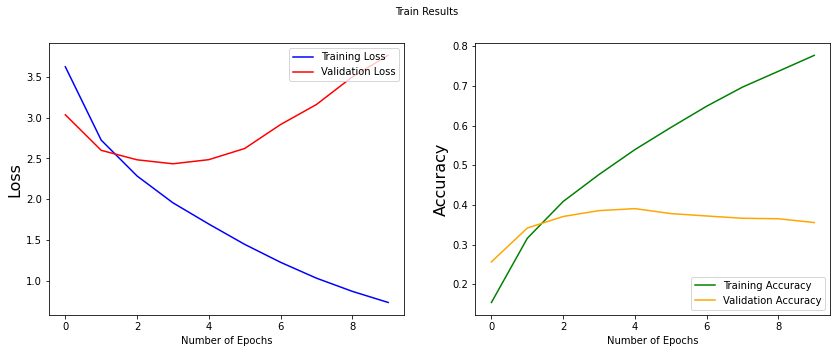


Train accuracy of the model: 77.68800258636475
Train loss of the model:  0.7351690530776978
Validation accuracy of the model:  0.3555000126361847
Validation loss of the model:  3.7622334957122803
Test Loss: 3.7622334957122803
Test Accuracy: 0.3555000126361847


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

### baseline model 3

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))
# compile model
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

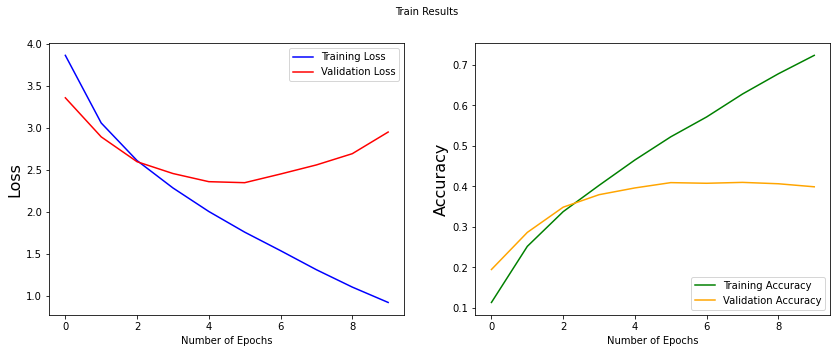


Train accuracy of the model: 72.35400080680847
Train loss of the model:  0.9225706458091736
Validation accuracy of the model:  0.39899998903274536
Validation loss of the model:  2.9529590606689453
Test Loss: 2.95295786857605
Test Accuracy: 0.39899998903274536


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

The best baseline model is model 3 with the highest validation accuracy and test accuracy however this model is overfitted and thus we will now be making amendments:

# IMPROVING THE MODEL

## Regularization

### DROPOUT

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

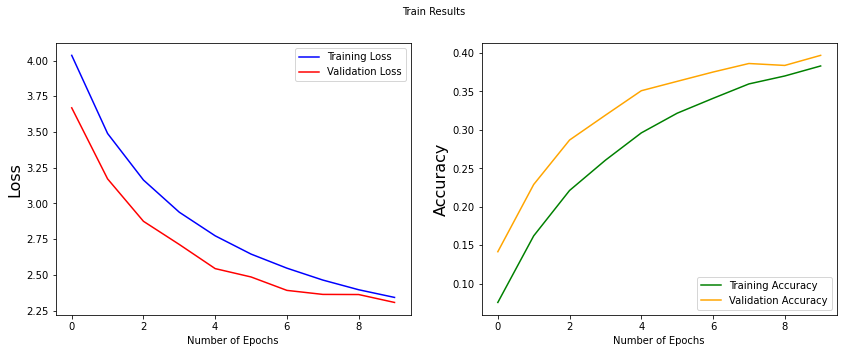


Train accuracy of the model: 38.31000030040741
Train loss of the model:  2.3424484729766846
Validation accuracy of the model:  0.3968999981880188
Validation loss of the model:  2.307276964187622
Test Loss: 2.307276964187622
Test Accuracy: 0.3968999981880188


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

The validation accuracy with dropout does not really change as compared to the baseline model but lets try increasing the number of epoch since the model works well with increasinf epoch based on the graphs

In [ ]:
# fitting with 20 epoch

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

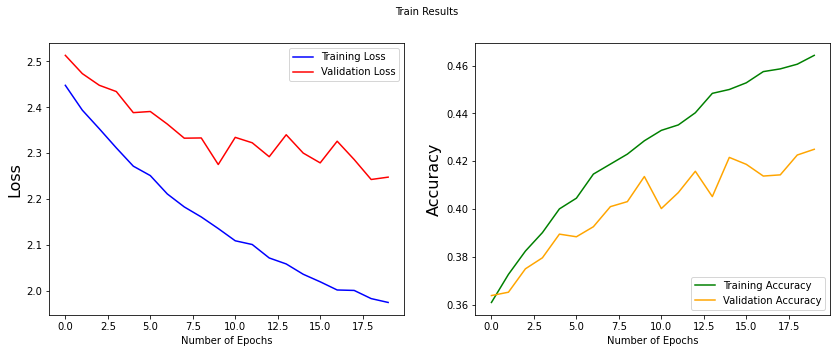


Train accuracy of the model: 46.43000066280365
Train loss of the model:  1.9752439260482788
Validation accuracy of the model:  0.42500001192092896
Validation loss of the model:  2.2479846477508545
Test Loss: 2.2479846477508545
Test Accuracy: 0.42500001192092896


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

With increasing epoch, the test and train accuracy does get higher so lets continue to increase the number of epoch

In [1]:
# fitting with 30 epochs

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

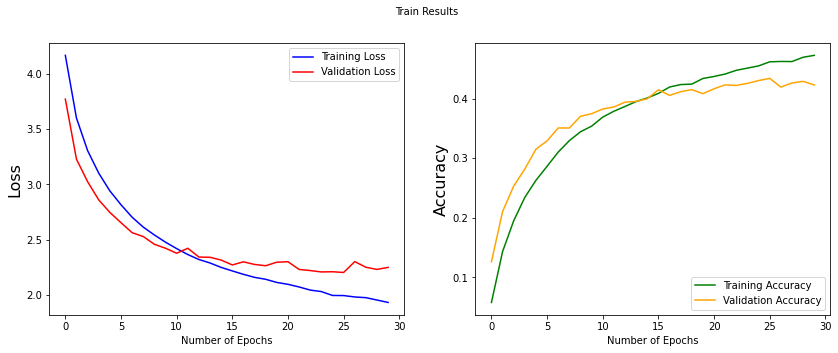


Train accuracy of the model: 47.255998849868774
Train loss of the model:  1.9315215349197388
Validation accuracy of the model:  0.42289999127388
Validation loss of the model:  2.248945474624634
Test Loss: 2.248945474624634
Test Accuracy: 0.42289999127388


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

### DATA AUGMENTATION + DROPOUT

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

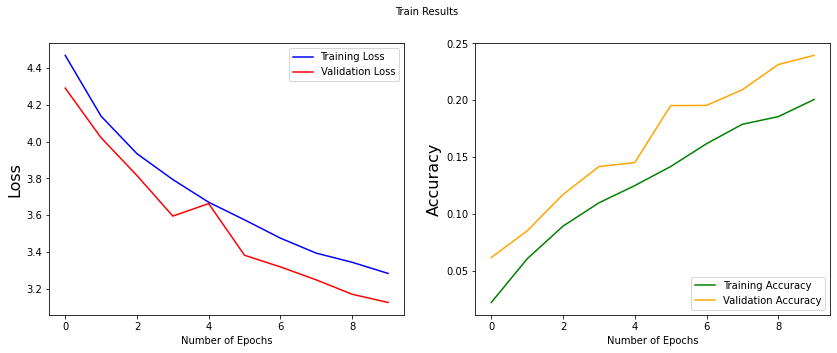


Train accuracy of the model: 20.070070028305054
Train loss of the model:  3.283585548400879
Validation accuracy of the model:  0.2395000010728836
Validation loss of the model:  3.1255364418029785
Test Loss: 3.1255364418029785
Test Accuracy: 0.2395000010728836


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),shuffle=True, epochs=10, validation_data = (X_test, y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 100)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test accuracy and validation accuracy with data augmentation is much lower and thus we will not be using it and there is no need to test out with a larger epoch

## BEST MODEL - Baseline Model 3 + Dropout 

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

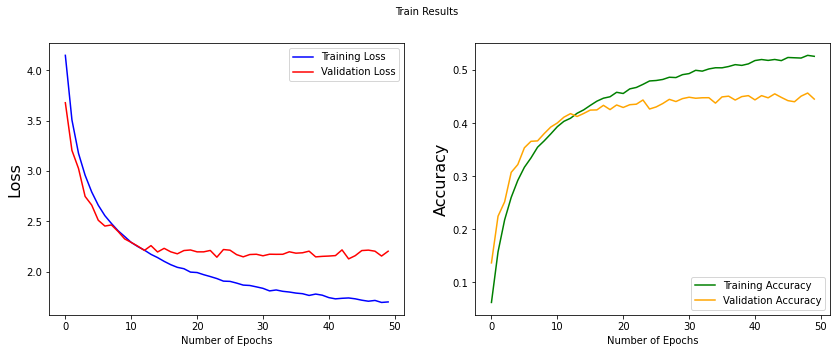


Train accuracy of the model: 52.63199806213379
Train loss of the model:  1.7007933855056763
Validation accuracy of the model:  0.4456999897956848
Validation loss of the model:  2.2042770385742188
Test Loss: 2.2042770385742188
Test Accuracy: 0.4456999897956848


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

The test accuracy is the highest and this model is the least overfitted

### Results

313/313 [==============================] - 2s 4ms/step


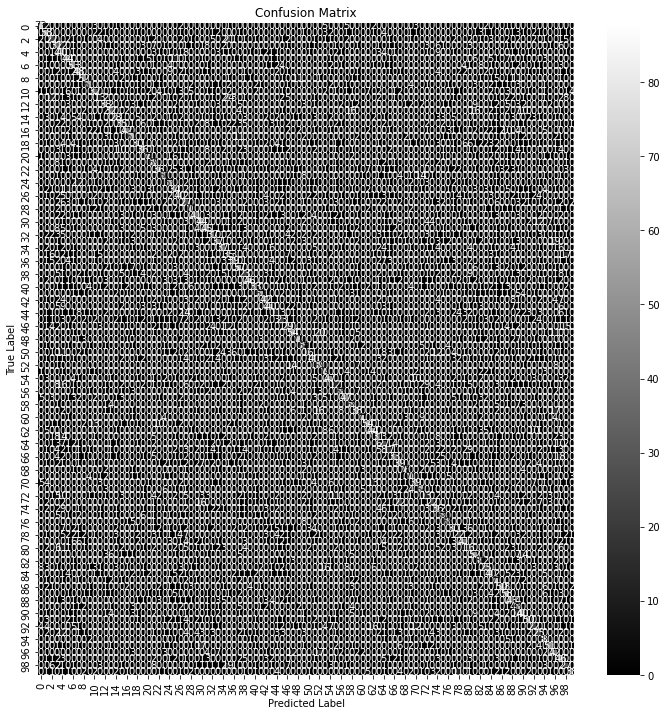

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
for i in range(len(confusion_mtx)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_mtx[i])-confusion_mtx[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(confusion_mtx[i][i] / 10))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 27 out of 1000
Percentage of True Prediction: 7.30%
***********************************************************
Class: 1
Number of Wrong Prediction: 42 out of 1000
Percentage of True Prediction: 5.80%
***********************************************************
Class: 2
Number of Wrong Prediction: 78 out of 1000
Percentage of True Prediction: 2.20%
***********************************************************
Class: 3
Number of Wrong Prediction: 68 out of 1000
Percentage of True Prediction: 3.20%
***********************************************************
Class: 4
Number of Wrong Prediction: 60 out of 1000
Percentage of True Prediction: 4.00%
***********************************************************
Class: 5
Number of Wrong Prediction: 56 out of 1000
Percentage of True Prediction: 4.40%
***********************************************************
Class: 6
Number of Wrong Prediction: 47 out of 1000
Percentage of True Prediction: 5.30%
*****************

# CIFAR COARSE MODE


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

## DATA VISUALIZATION

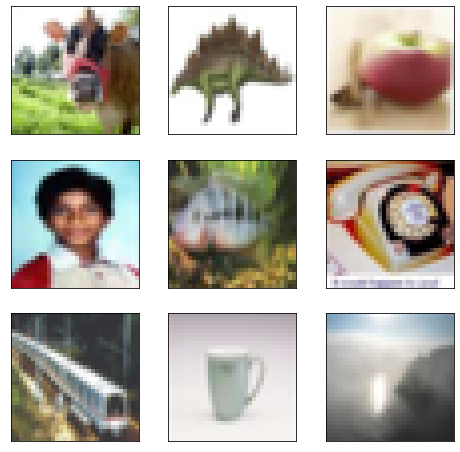

In [ ]:
def visualize_random_images(images):
    plt.figure(figsize=(8,8))
    for ind, img in enumerate(images[:9, :]):
        plt.subplot(int("33%d" % (ind + 1)))
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.show()
    
visualize_random_images(X_train)

## DATA PREPROCESSING

In [ ]:
# one hot encode target values
# one hot encode target values
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

X_train, X_test = prep_pixels(X_train, X_test)

## TRAINING AND EVALUATION

I will be doing the same thing - making 3 different baseline models and then picking the best

### BASELINE MODEL 1 

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                        

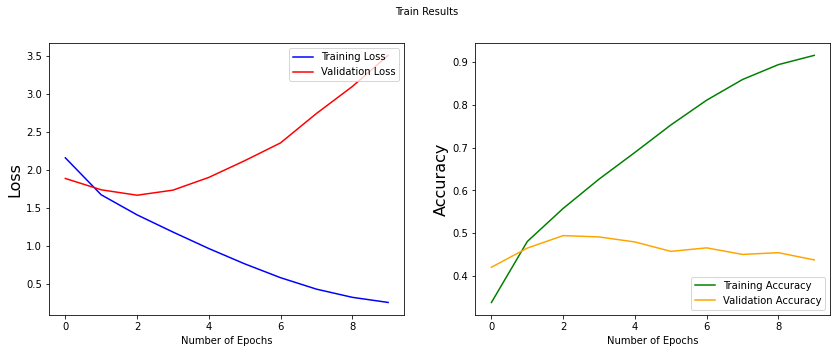


Train accuracy of the model: 91.61400198936462
Train loss of the model:  0.2562173008918762
Validation accuracy of the model:  0.43700000643730164
Validation loss of the model:  3.509976863861084
Test Loss: 3.509976863861084
Test Accuracy: 0.43700000643730164


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

### BASELINE MODEL 2

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))
# compile model
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

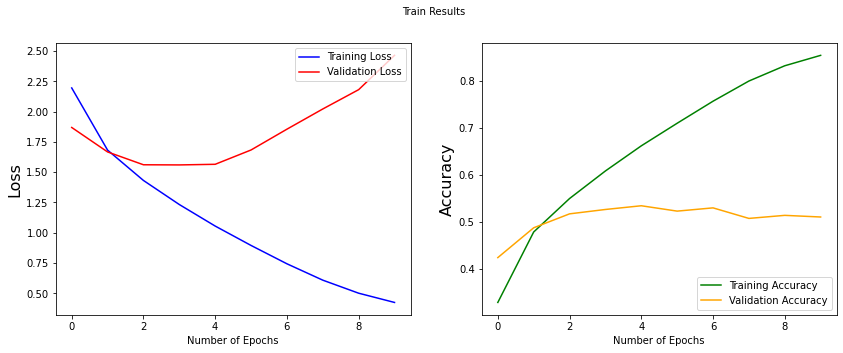


Train accuracy of the model: 85.34600138664246
Train loss of the model:  0.4249880909919739
Validation accuracy of the model:  0.5098999738693237
Validation loss of the model:  2.4646177291870117
Test Loss: 2.4646177291870117
Test Accuracy: 0.5098999738693237


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

### BASELINE MODEL 3

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation='softmax'))
# compile model
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

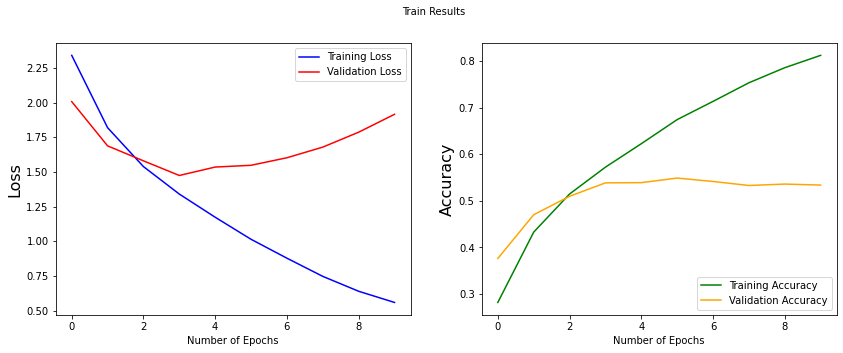


Train accuracy of the model: 81.22000098228455
Train loss of the model:  0.5592138171195984
Validation accuracy of the model:  0.5339000225067139
Validation loss of the model:  1.9151005744934082
Test Loss: 1.9151005744934082
Test Accuracy: 0.5339000225067139


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Baseline Model 3 has the highest test and validation accuracy but there is is stil room for improvement to reduce the overfitting

## IMPROVING THE MODEL

### DROPOUT

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

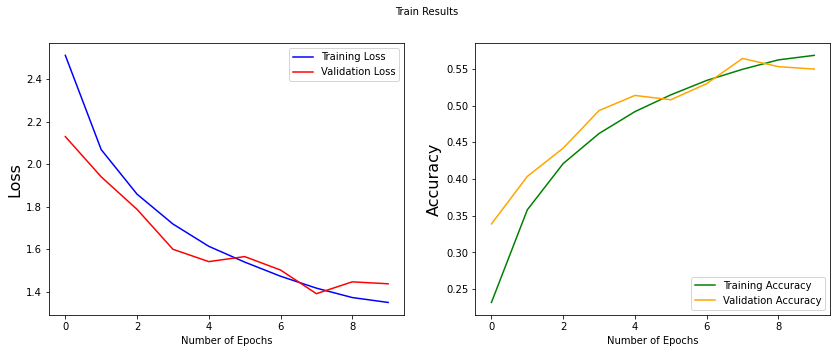


Train accuracy of the model: 56.84000253677368
Train loss of the model:  1.3484593629837036
Validation accuracy of the model:  0.5497000217437744
Validation loss of the model:  1.4363957643508911
Test Loss: 1.4363957643508911
Test Accuracy: 0.5497000217437744


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

The test accuracy is not really different from baseline model 3 that does not have dropout but since the model's performance does improve with increasing epoch lets try to fit the model with a larger number of epoch

In [2]:
# fitting with 40 epoch

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

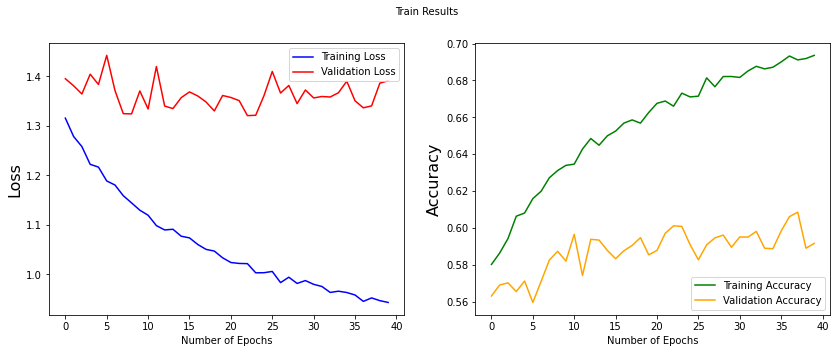


Train accuracy of the model: 69.35799717903137
Train loss of the model:  0.9434699416160583
Validation accuracy of the model:  0.59170001745224
Validation loss of the model:  1.39094877243042
Test Loss: 1.39094877243042
Test Accuracy: 0.59170001745224


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

The test accuracy si now much higher compared to baseline model 3

### DROPOUT + DATA AUGMENTATION

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.1,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

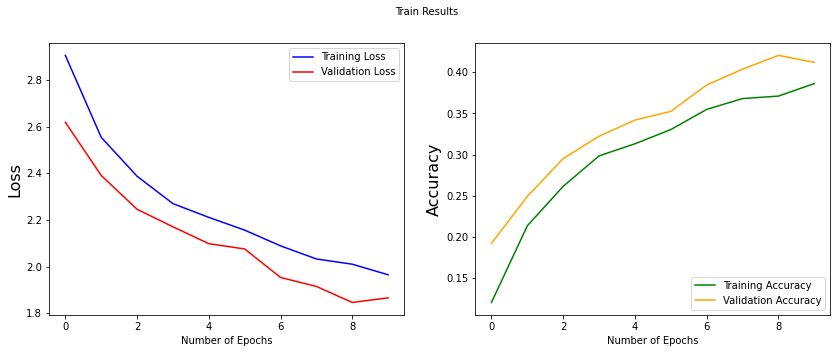


Train accuracy of the model: 38.618749380111694
Train loss of the model:  1.964614987373352
Validation accuracy of the model:  0.41200000047683716
Validation loss of the model:  1.8657792806625366
Test Loss: 1.8657792806625366
Test Accuracy: 0.41200000047683716


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),shuffle=True, epochs=10, validation_data = (X_test, y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 100)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Since the model does improve with increasing epoch, let's try to increase the epoch

In [3]:
# fitting with 30 epoch

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

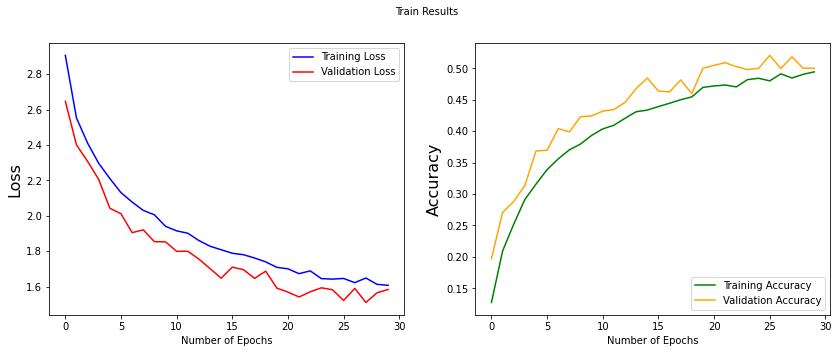


Train accuracy of the model: 49.44374859333038
Train loss of the model:  1.6071778535842896
Validation accuracy of the model:  0.5001999735832214
Validation loss of the model:  1.5835617780685425
Test Loss: 1.5835617780685425
Test Accuracy: 0.5001999735832214


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),shuffle=True, epochs=30, validation_data = (X_test, y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 100)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

The results seem to be good so I will continue to increase the epoch and test

In [4]:
# fitting in with 40 epoch

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

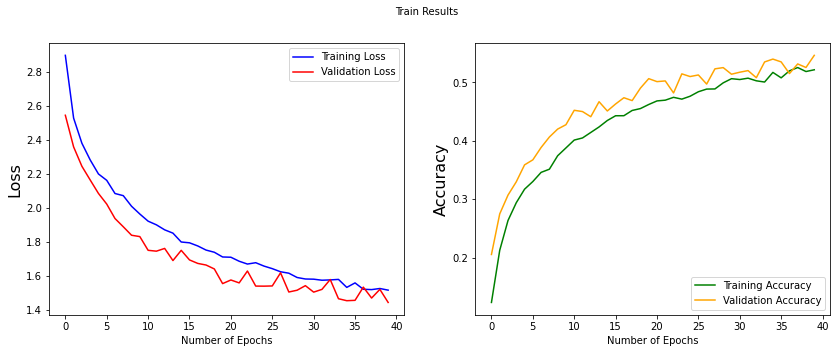


Train accuracy of the model: 52.16875076293945
Train loss of the model:  1.5154067277908325
Validation accuracy of the model:  0.5464000105857849
Validation loss of the model:  1.442899227142334
Test Loss: 1.442899227142334
Test Accuracy: 0.5464000105857849


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),shuffle=True, epochs=40, validation_data = (X_test, y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 100)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Data Augmentation works well for the models for this dataset however the test and validation accuracy without data augmentation is much higher

### BEST MODEL - Baseline model 3 + Dropout 

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='softmax'))
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_49 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_50 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_51 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

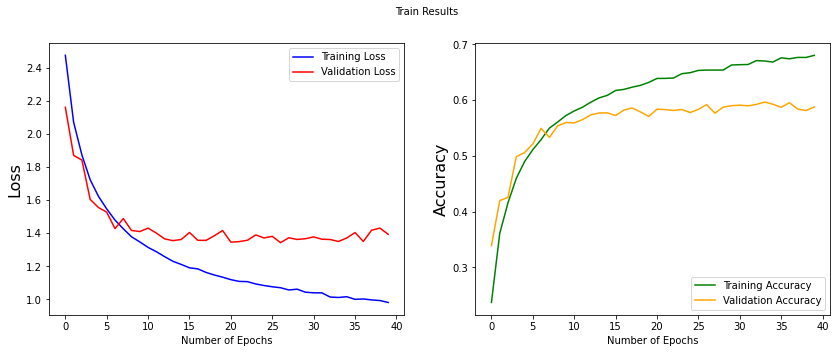


Train accuracy of the model: 68.0400013923645
Train loss of the model:  0.9819034337997437
Validation accuracy of the model:  0.5877000093460083
Validation loss of the model:  1.3938287496566772
Test Loss: 1.3938287496566772
Test Accuracy: 0.5877000093460083


In [ ]:
scores, histories = list(), list()
model.summary()
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)
scores = model.evaluate(X_test, y_test, verbose=0)
scores.append(acc)
histories.append(history)

plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel("Number of Epochs")
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], color='green', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

print('\nTrain accuracy of the model:', (history.history['accuracy'][-1] * 100))
print('Train loss of the model: ',history.history['loss'][-1])
print('Validation accuracy of the model: ',history.history['val_accuracy'][-1])
print('Validation loss of the model: ',history.history['val_loss'][-1])
score = model.evaluate(X_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

The model has a decent test accuracy and train accuracy and is not as overfitted as baseline model 3

## RESULTS

313/313 [==============================] - 1s 3ms/step


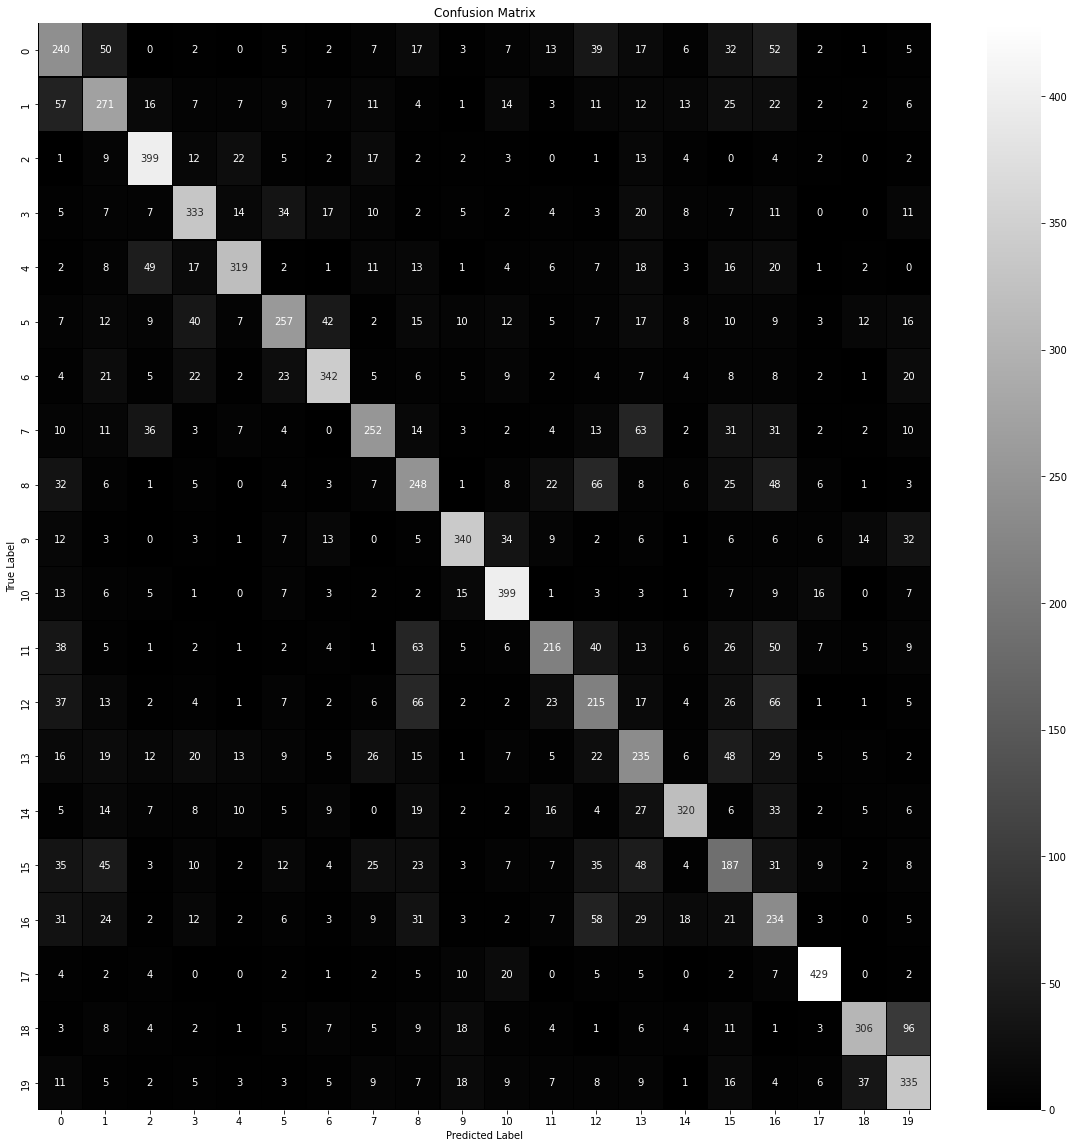

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize = (20,20))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:

for i in range(len(confusion_mtx)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_mtx[i])-confusion_mtx[i][i]), "out of 1000")
    print("Percentage of True Prediction: {:.2f}%".format(confusion_mtx[i][i] / 10))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 260 out of 1000
Percentage of True Prediction: 24.00%
***********************************************************
Class: 1
Number of Wrong Prediction: 229 out of 1000
Percentage of True Prediction: 27.10%
***********************************************************
Class: 2
Number of Wrong Prediction: 101 out of 1000
Percentage of True Prediction: 39.90%
***********************************************************
Class: 3
Number of Wrong Prediction: 167 out of 1000
Percentage of True Prediction: 33.30%
***********************************************************
Class: 4
Number of Wrong Prediction: 181 out of 1000
Percentage of True Prediction: 31.90%
***********************************************************
Class: 5
Number of Wrong Prediction: 243 out of 1000
Percentage of True Prediction: 25.70%
***********************************************************
Class: 6
Number of Wrong Prediction: 158 out of 1000
Percentage of True Prediction: 34.20%
***

The performance for this model is also not bad